# Семинар 4
## Задача регрессии

### Темы на занятие:
1. Постановка задачи обучения с учителем
2. Метрики качества
3. Функции ошибки
4. Алгоритм kNN
5. Линейная регрессия "на пальцах"

Источники:
1. https://vas3k.ru/blog/machine_learning/

#### Импортирование библиотек и загрузка датасета

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format="retina"

In [2]:
# Будем использовать набор данных Automobile Data Set (https://archive.ics.uci.edu/ml/datasets/Automobile).
# В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [3]:
columns = ["symboling",
 "normalized-losses",
 "make",
 "fuel-type",
 "aspiration",
 "num-of-doors",
 "body-style",
 "drive-wheels",
 "engine-location",
 "wheel-base",
 "length",
 "width",
 "height",
 "curb-weight",
 "engine-type",
 "num-of-cylinders",
 "engine-size",
 "fuel-system",
 "bore",
 "stroke",
 "compression-ratio",
 "horsepower",
 "peak-rpm",
 "city-mpg",
 "highway-mpg",
 "price"]

In [80]:
# Загрузим данные при помощи read_csv по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
# Помним о аргументах header и names

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None, names=columns)

In [81]:
# Посмотрим, что все загрузилось верно выведя первые строчки датасета

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Постановка задачи

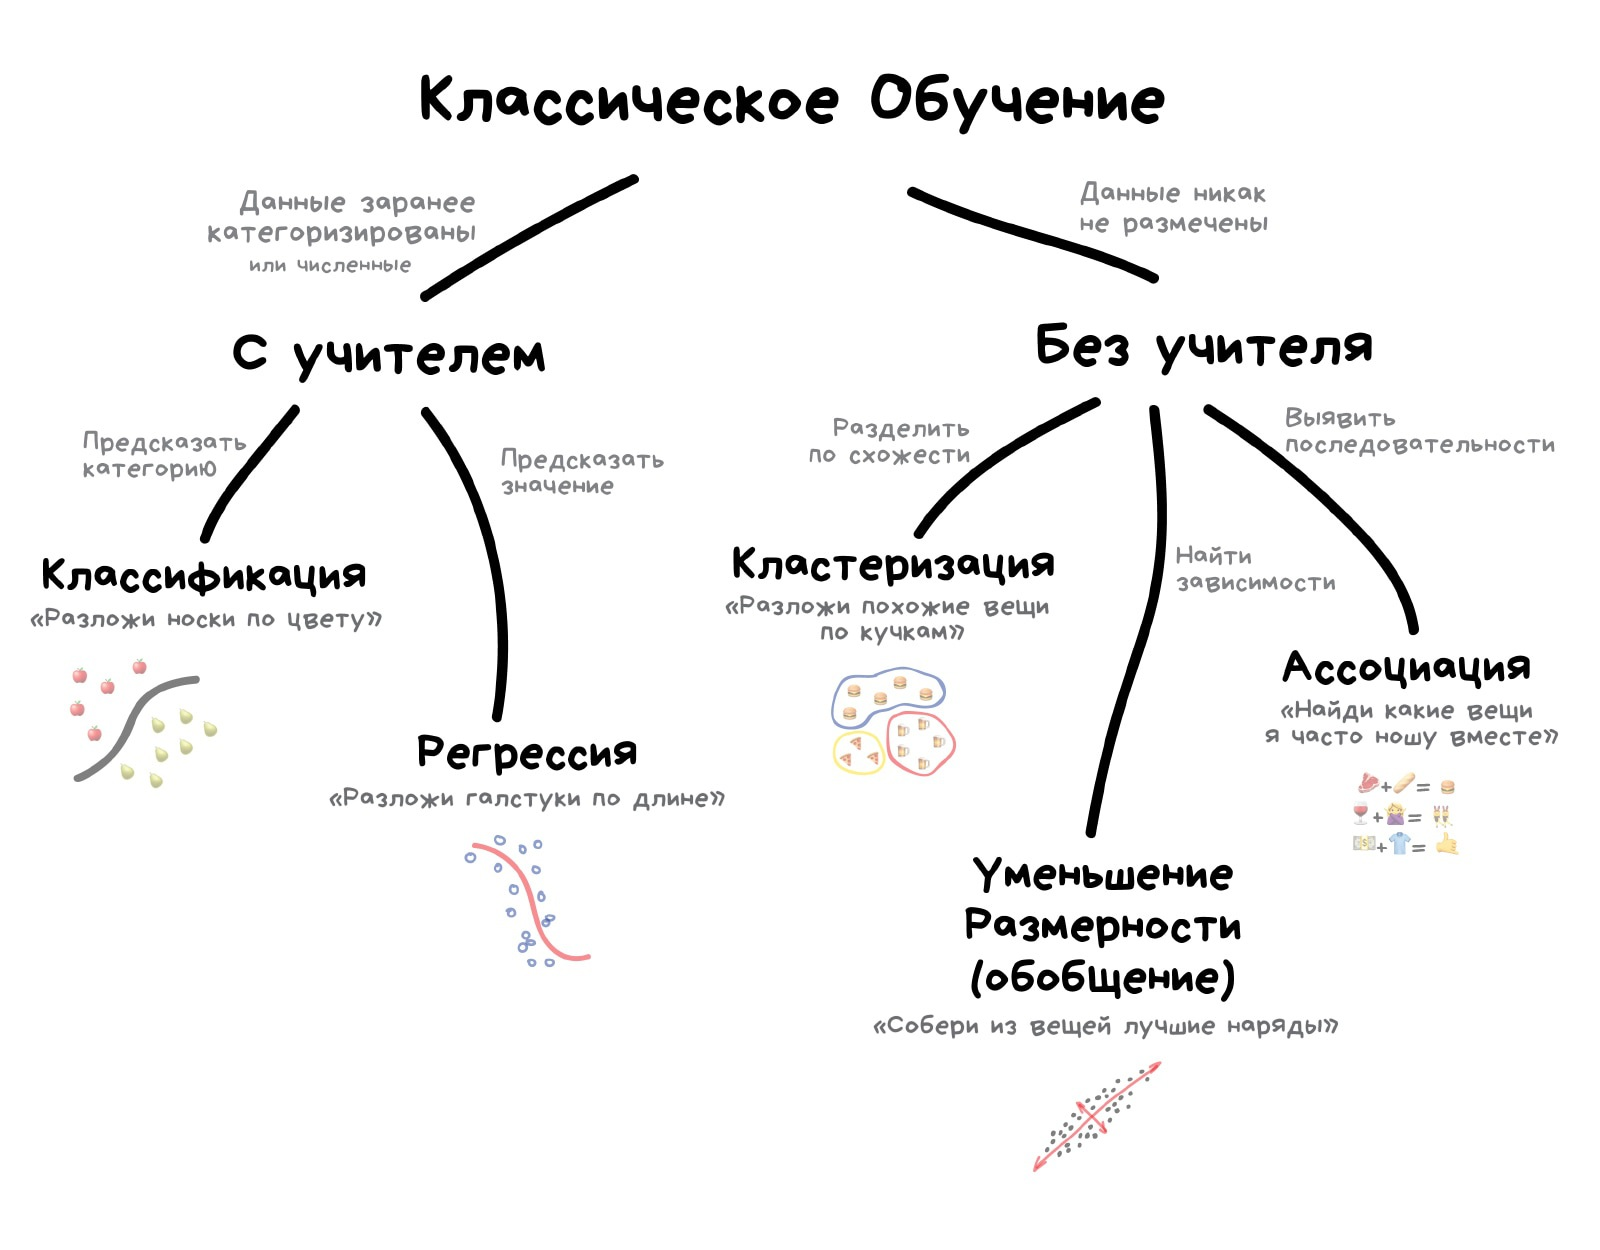

«Нарисуй линию вдоль моих точек. Да, это машинное обучение»

Сегодня используют для:

1. Прогноз стоимости ценных бумаг
2. Анализ спроса, объема продаж
3. Медицинские диагнозы
4. Любые зависимости числа от времени
5. Многих других задач

In [82]:
# Посмотрим на наш датасет. Какая у нас задача?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Посмотрим на наши данные, найдем пропуски, закодируем признаки

In [83]:
# Посчитаем сколько пропусков в наших данных

df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [84]:
# Почему так мало?
# Давайте еще раз посмотрим на датасет

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [85]:
# Видим, что пропуски в данных помечаются "?". Давайте посчитаем сколько таких знаков

(df == "?").sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [86]:
# Заменим "?" на None при помощи метода replace

df = df.replace({"?": None})

In [87]:
# Давайте найдем признаки, в которых меньше 10 уникальных значений
# Какие из них являются категориальными?

df.nunique()[df.nunique() < 10].index

Index(['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [88]:
# Давайте внимательно посмотрим на столбец "make". Что он из себя представляет?

df["make"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [89]:
# Удалим пока столбец make

df = df.drop(columns=["make"])

In [90]:
# Пока что удалим все пропуски (Если будем заниматься улучшением моделей, то стоит вернуться к этому этапу)

df = df.dropna()

In [91]:
# Закодируем OHE категориальные признаки. Для этого воспользуемся функцией get_dummies библиотеки pandas

df = pd.get_dummies(
    df,
    columns=['symboling', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'],
    drop_first=True
)

In [92]:
# Посмотрим какого типа у нас в итоге колонки. Например при помощи метода .select_dtypes(object)

df.select_dtypes(object)

,normalized-losses,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
3,164,four,four,3.19,3.40,102,5500,13950
4,164,four,five,3.19,3.40,115,5500,17450
6,158,four,five,3.19,3.40,110,5500,17710
8,158,four,five,3.13,3.40,140,5500,23875
10,192,two,four,3.50,2.80,101,5800,16430
...,...,...,...,...,...,...,...,...
200,95,four,four,3.78,3.15,114,5400,16845
201,95,four,four,3.78,3.15,160,5300,19045
202,95,four,six,3.58,2.87,134,5500,21485
203,95,four,six,3.01,3.40,106,4800,22470


In [93]:
# Те столбцы, которые можно явно перевести в цифры (например если в столбцах цифры написаны буквами), переведем при помощи .replace
# Какие это столбцы?

str_num_cols = ["num-of-doors", "num-of-cylinders"]
df[str_num_cols] = df[str_num_cols].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8})

In [94]:
# Поскольку модели работать с типом данных object не могут, конвертируем все столбцы в тип float

df = df.astype(float)

In [95]:
from sklearn.model_selection import train_test_split

# Разобьем датасет на признаки и таргет
X = df.drop(columns=["price"])
y = df["price"]

# Разделим данные на обучение и тест, воспользовавшись функцией train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [96]:
X_train

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,drive-wheels_rwd,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
42,107.0,2.0,96.5,169.1,66.0,51.0,2293.0,4.0,110.0,3.15,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
166,168.0,2.0,94.5,168.7,64.0,52.6,2300.0,4.0,98.0,3.24,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
136,150.0,2.0,99.1,186.6,66.5,56.1,2808.0,4.0,121.0,3.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,125.0,4.0,96.3,172.4,65.4,51.6,2405.0,4.0,122.0,3.35,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
187,94.0,4.0,97.3,171.7,65.5,55.7,2319.0,4.0,97.0,3.01,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,128.0,4.0,100.4,181.7,66.5,55.1,3095.0,6.0,181.0,3.43,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
147,89.0,4.0,97.0,173.5,65.4,53.0,2455.0,4.0,108.0,3.62,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
24,148.0,4.0,93.7,157.3,63.8,50.6,1967.0,4.0,90.0,2.97,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
133,104.0,4.0,99.1,186.6,66.5,56.1,2695.0,4.0,121.0,3.54,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Еще раз вспомним про алгоритм kNN

`k Nearest Neighbor` является одним из самых простых алгоритмов машинного обучения и, хоть он зачастую не может хорошо решить поставленную задачу машинного обучения, его используют как подготовительный фильтр для объектов, которые будут проверятся более сложными моделями.

Еще одним преимуществом данного алгоритма является его **интерпретируемость**. То есть мы можем проанализировать почему наша модель приняла то или иное решение.

Однако алгоритм имеет ряд ограничений для данных, о которых мы поговорим в постановке.

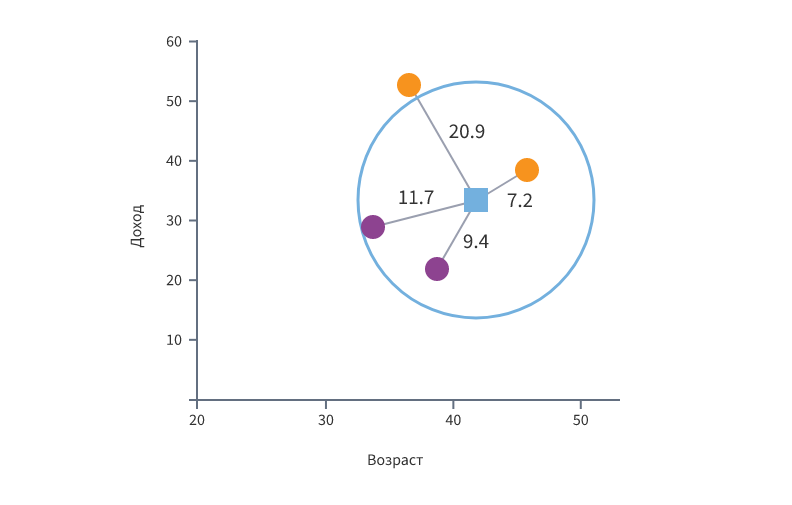

##### Постановка задачи и построение решения

У нас есть данные, которые записаны в виде матрицы размера $M\times N$, где $M$ число объектов, а $N$ -- число признаков.

Введем вспомогательное понятие -- **метрическое пространство**. Это такое пространство на котором задано расстояние между точками (расстояние измеряется метрикой). Самый простой пример -- это карта, например, в Яндекс.Карты. 

*Как на картах посчитать расстояние между начальной точкой маршрута и конечной точкой маршрута? А как это сделать в нашем с вами трехмерном пространстве?*

$$\rho(x, y) = \sqrt{\sum_i (x_i - y_i)^2}$$

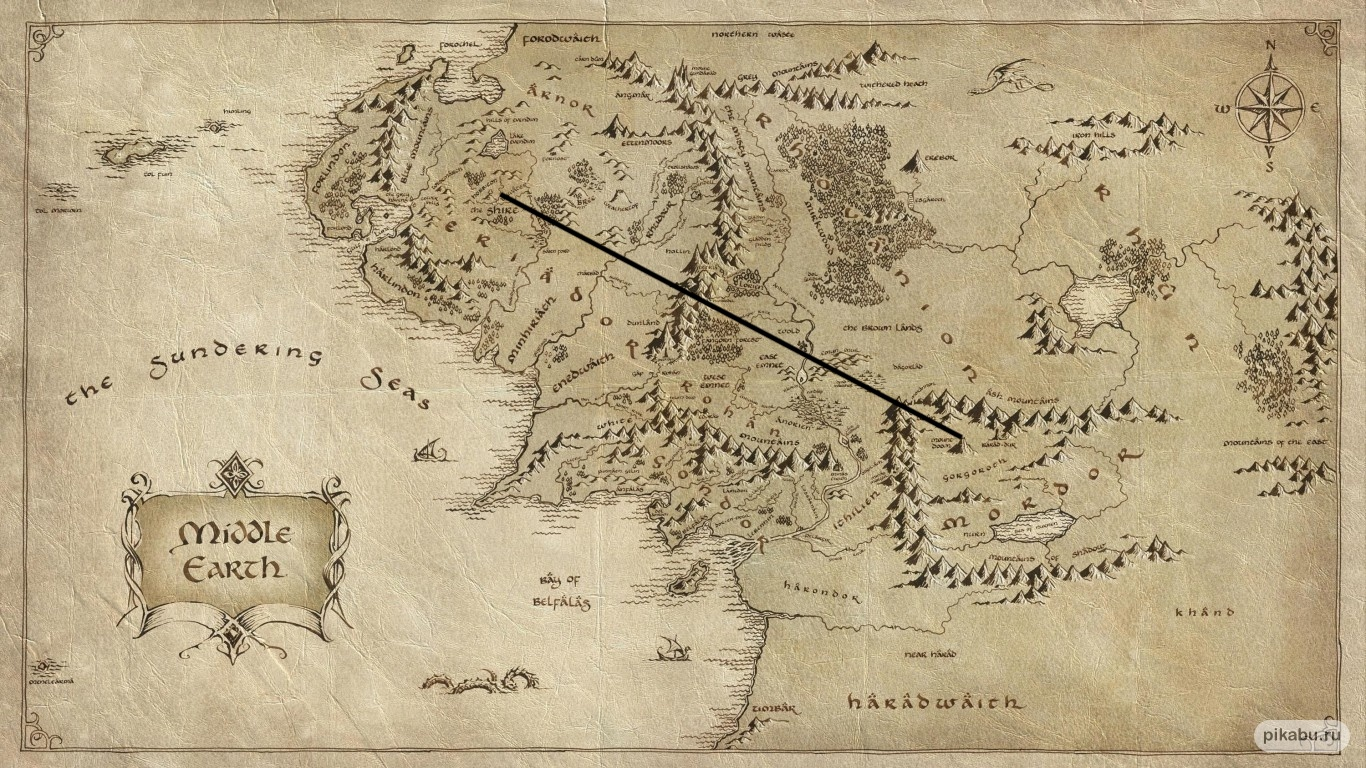

Сделаем предположение, что все $N$ признаков находятся в одном (часто однородном) метрическом пространстве. Если это так, то каждый из $M$ объектов является просто точкой в $N$-мерном метрическом пространстве, а это значит, что мы можем посчитать расстояние между любыми двумя точками.

Тогда если мы выберем какую-нибудь точку, то мы сможем сказать как из $M-1$ оставшихся точек будет являтся самой близжайшей к рассматриваемой -- такую точку назовем близжайшим соседом. Аналогично можно определить второго по близости соседа и т.д.

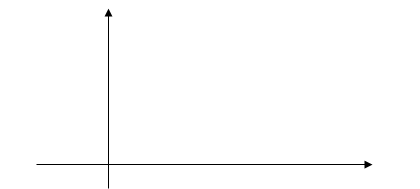



Теперь поскольку мы приняли, что наше пространство метрическое и однородное, мы можем утверждать, что точки, расстояние между которыми небольшое, будут похожи между собой, а те, у которых расстояние будет большим, будут являться непохожими.

Давайте посмотрим, что нам дает такое предположение на примере цены квартиры в зависимости от площади:

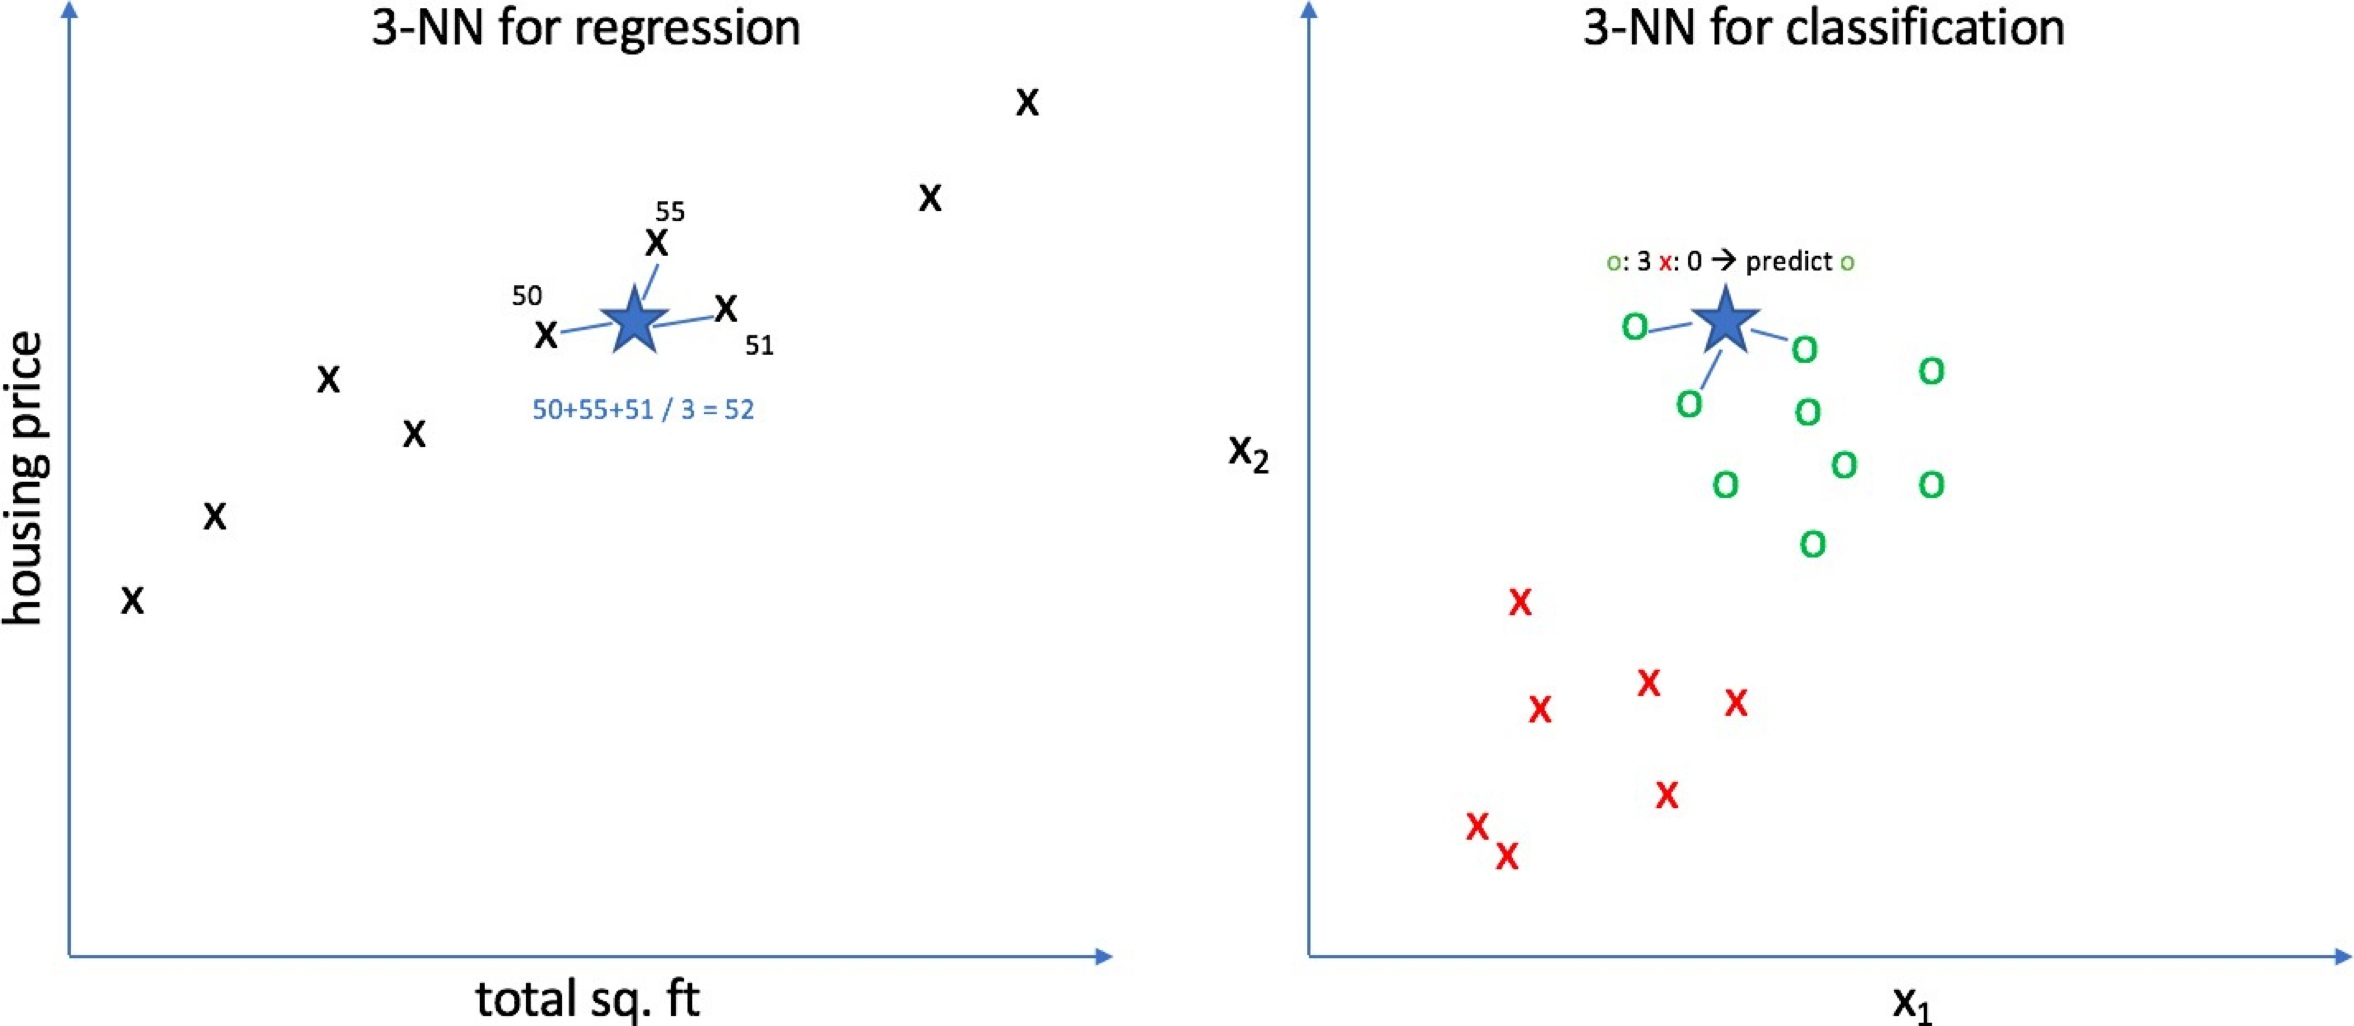

При использовании алгоритма `k Ближайших Соседей` "обучения" как такого не происходит, единственное, что вам нужно сделать -- это запомнить расположения точек в прострастве и их таргетов. При предсказаниях, мы будем присваивать, например, среднее значение $k$ его ближайших соседей.

##### Реализация kNN в библиотеки sklearn

Главный настраиваемый параметр алгоритма -- это конечно число соседей (`k`). Часто этот параметр имеет оптимальное значение, то есть такое значение, что все меньше него и больше него будут давать результат хуже.

Полный список параметров вы можете посмотреть на [странице библиотеки](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

In [97]:
from sklearn.neighbors import KNeighborsRegressor

# Создадим экземпляр класса KNeighborsRegressor с числом ближайших соседей (n_neighbors) равным 5
model_knn = KNeighborsRegressor(n_neighbors = 5)

# Обучим модель
model_knn.fit(X_train, y_train)
# Сделаем предсказание на тестовой выборке
y_pred = model_knn.predict(X_test)

У нас получилась хорошая модель или плохая?

##### Качество выбранного решения

В задачах регрессии часто оценивают качество выбранного решения по тому, насколько алгоритм ошибается на отложенных данных, так например часто смотрят на (здесь $\widetilde{y}$ -- предсказанное значение, $y$ -- реальное значение):

* Mean Square Error (MSE): $\frac{1}{n}\sum\limits_i^n(\widetilde{y}_i - y_i)^2$
* Mean Absolute Error (MAE): $\frac{1}{n}\sum\limits_i^n|\widetilde{y}_i - y_i|$
* Max Error: $\max\limits_i |\widetilde{y}_i - y_i|$



In [98]:
# Тут давайте напишем функции ошибок (можно обычные, можно lambda-функции)

MSE = lambda y1, y2: 1 / len(y1) * sum((y1 - y2)**2)
MAE = lambda y1, y2: 1 / len(y1) * sum(abs(y1 - y2))
MAX_ERROR = lambda y1, y2: abs(y1 - y2).max()

##### Реализация метрик качества в sklearn

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

# Эти функции ошибки реализованы в модуле metrics библиотеки sklearn -- давайте ими воспользуемся
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAX_ERROR: ", max_error(y_test, y_pred))

MSE:  4845037.363333333
MAE:  1417.6833333333332
MAX_ERROR:  8736.599999999999


#### Поговорим о линейной регрессии

`Линейная регрессия` является второй по популярности моделью машинного обучения (часто, когда в СМИ пишут "искуственный интеллект", на самом деле оказывается простой линейной моделью). Эта модель старается аппроксимировать данные прямой (даже если это невозможно).

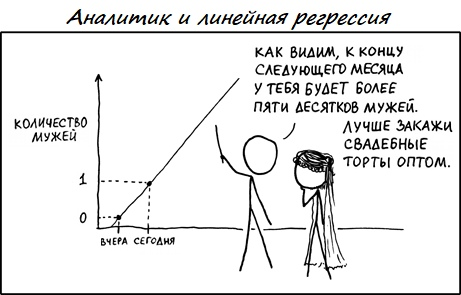

##### Постановка задачи и построение решения

У нас есть данные, которые записаны в виде матрицы размера  $M\times N$ , где $M$ число объектов, а $N$ -- число признаков. Кроме того, у нас есть столбец таргета $Y$.

Мы хотим построить прямую (в общем случае гиперплоскость), которая бы наилучшим образом приближала наши данные в каждой из точек(для каждого объекта).

Например мы можем рассматривать в качестве приближения объекта прямой $(\widetilde{y}_i - y_i)^2$. Чем меньше это значение, тем лучше прямая приближает объект. Если мы хотим приблидать несколько объектов, то можно использовать $\sum\limits_i^n(\widetilde{y}_i - y_i)^2$.


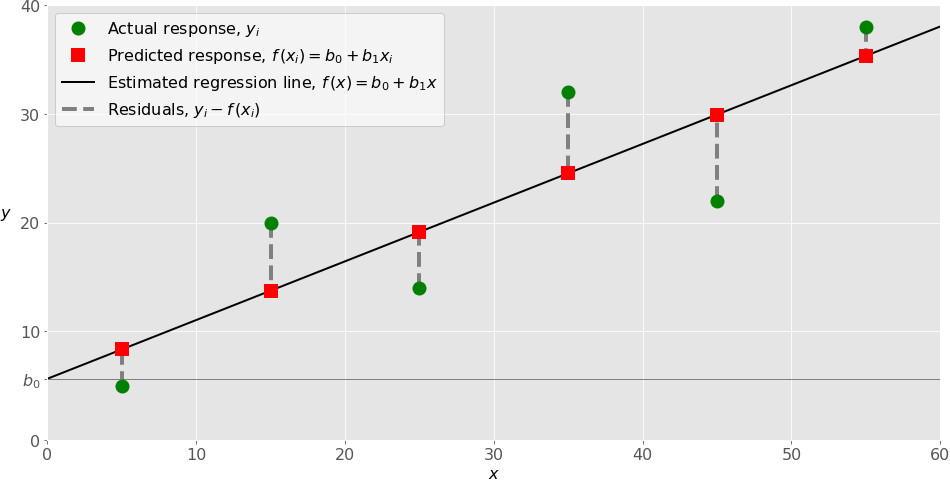

С тем, что мы бы хотели сделать с прямой, мы разобрались, но давайте поговрим о самой прямой(гиперплоскости в общем случае).
Из школы мы помним, что прямую можно задать уравнением $y = kx + b$ и тогда нам нужно определить параметры $k$ и $b$ для нашей "лучшей прямой". В случае, если у нас не прямая, а гиперплоскость, это уравнение переписывается как:
$$y = \sum_i w_i x_i + w_0 = \langle \hat{w}, x \rangle$$
Здесь $x$ -- это строка матрицы объект-признаки, которую мы определили в самом начале, $w$ -- называют вектором весов, а $w_0$ свободным членом.

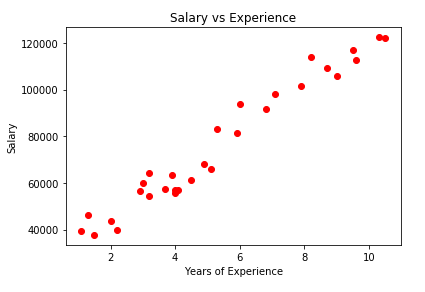

Мы обсудили интуицию по которой находится "идеальная линия", но точное ее нахождение мы обсудим на одном из следующих семинаров, а сейчас перейдем к реализации модели в sklearn.

##### Реализация линейной регрессии в библиотеки sklearn

У классической линейной регрессии нет настраиваемых параметров. Однако они есть у более продвинутых версий, о которых мы поговорим на следующем занятии.

Но технические параметры можно посмотреть на [странице библиотеки](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [100]:
from sklearn.linear_model import LinearRegression

# Создадим экземпляр класса LinearRegression без параметров
model_lr = LinearRegression()

# Обучим модель
model_lr.fit(X_train, y_train)
# Сделаем предсказание на тестовой выборке
y_pred = model_lr.predict(X_test)

##### Еще способы измерить качество решения

Если оценивать качество с точки зрения ошибки, то становится трудно понять какие изменение в ошибки существенно и насколько это влияет на картину мира, поэтому были придуманы другие способы измерять качество работы регрессии:

* Coefficient of determination ($R^2$): $1 - \frac{\sigma_{\widetilde{y}}^2}{\sigma_y^2} \in (-∞, 1)$
* Mean Absolute Percentage Error (MAPE): $100 \cdot \frac{1}{n}\sum\limits_i^n\left|\frac{y_i - \widetilde{y}_i}{y_i}\right| \in [0, +∞)$

Какие значения этих метрик будут у наилучшей модели? Чем эти метрики лучше предыдущих?

##### Реализация еще одних метрик качества в sklearn

In [101]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Эти функции ошибки реализованы в модуле metrics библиотеки sklearn -- давайте ими воспользуемся
print("R2: ", r2_score(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

R2:  0.55316160217207
MAPE:  0.1914065482239228


In [102]:
# Давайте сравним метрики KNN и Линейной регрессии

y_pred_knn = model_knn.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

print("MSE (KNN | LR): ", mean_squared_error(y_test, y_pred_knn), " | ", mean_squared_error(y_test, y_pred_lr))
print("MAE (KNN | LR): ", mean_absolute_error(y_test, y_pred_knn), " | ", mean_absolute_error(y_test, y_pred_lr))
print("MAX_ERROR (KNN | LR): ", max_error(y_test, y_pred_knn), " | ", max_error(y_test, y_pred_lr))

print("R2 (KNN | LR): ", r2_score(y_test, y_pred_knn), " | ", r2_score(y_test, y_pred_lr))
print("MAPE (KNN | LR): ", mean_absolute_percentage_error(y_test, y_pred_knn), " | ", mean_absolute_percentage_error(y_test, y_pred_lr))

MSE (KNN | LR):  4845037.363333333  |  6953781.9207084
MAE (KNN | LR):  1417.6833333333332  |  2002.3182937820711
MAX_ERROR (KNN | LR):  8736.599999999999  |  5883.631000121903
R2 (KNN | LR):  0.6886660011006247  |  0.55316160217207
MAPE (KNN | LR):  0.13561454516140967  |  0.1914065482239228


Получив метрики для baseline решения, можно окинуть взлядом проделанную работу  и подумать, что можно было бы улучшить:

1. Подходят ли наши данные под требования в метрических алгоритмах?
2. Правильно ли было все категориальные признаки кодировать OHE?
3. Не слишком ли много получилось признаков на такое небольшое число данных?
4. Стоило ли выкидывать строки с пропусками? Как мы можем их обработать?
5. Как можно использовать поле `make`?

Давайте и займемся этими улучшениями! Как насчет править прям бейзлайн решение? Надо только сохранить посчитанные метрики, чтобы убедиться, что мы не сделали хуже:)

#### Продвинутый анализ

In [103]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None, names=columns)

Давайте еще раз посмотрим на пропуски.

In [104]:
for col in df.columns:
    if('?' in df[col].values):
        print(col + " = " + str(len(df[df[col]=='?'])))

normalized-losses = 41
num-of-doors = 2
bore = 4
stroke = 4
horsepower = 2
peak-rpm = 2
price = 4


<ipython-input-104-4feed932ae88>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if('?' in df[col].values):


In [105]:
# Конвертируем тип данных и удаляем '?' из колонки price
df['price'] = df['price'].replace('?',np.nan)
df['price'] = pd.to_numeric(df['price'])
df = df[df['price'].notna()]

# Удаляем '?' из колонки num-of-doors 
df['num-of-doors'] = df['num-of-doors'].replace('?',np.nan)
df = df[df['num-of-doors'].notna()]

<ipython-input-105-3b96452a7b37>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num-of-doors'] = df['num-of-doors'].replace('?',np.nan)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

In [107]:
# Заменяем '?' средними значениями
num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in num_col:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)

In [108]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.840491,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.840491,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.840491,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,121.840491,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,121.840491,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


Распечатаем колонки по видам.

In [109]:
print("Список численных признаков: " , df.select_dtypes(include=np.number).columns.tolist())
print("Список категориальных признаков: " , df.select_dtypes(include=['object']).columns.tolist())

Список численных признаков:  ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
Список категориальных признаков:  ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


Построим матрицу корреляций для численных признаков.

<AxesSubplot:>

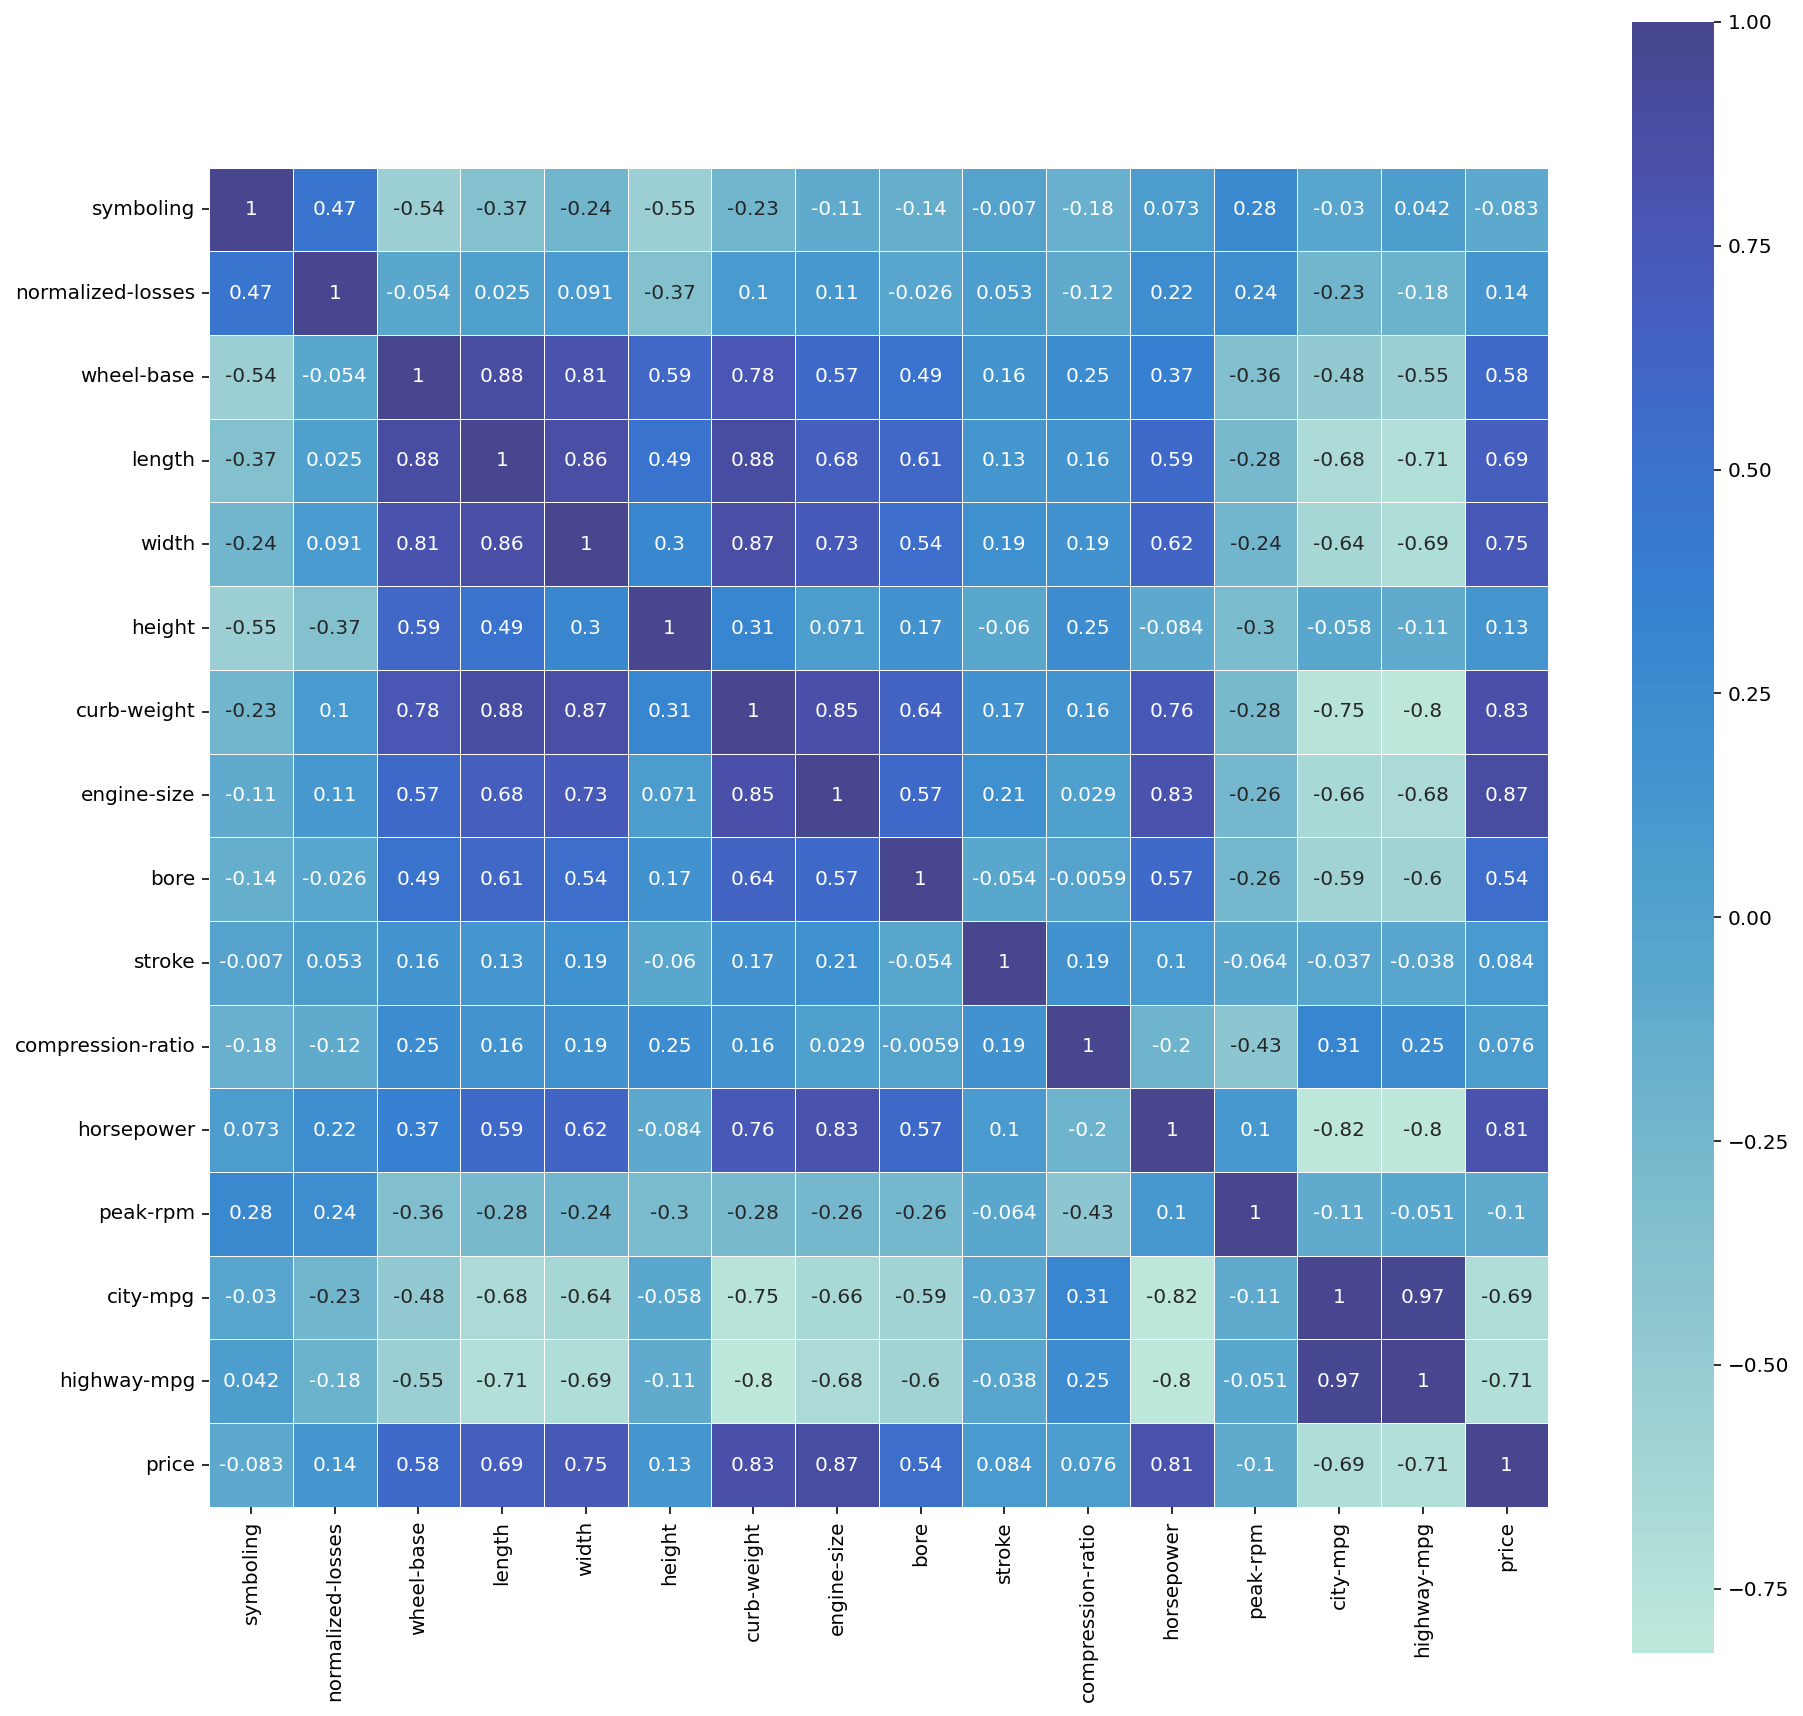

In [110]:
corr = df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].corr()
f,axes = plt.subplots(1,1,figsize = (15,15))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)

Построим корреляции между численными признаками и таргетом. 

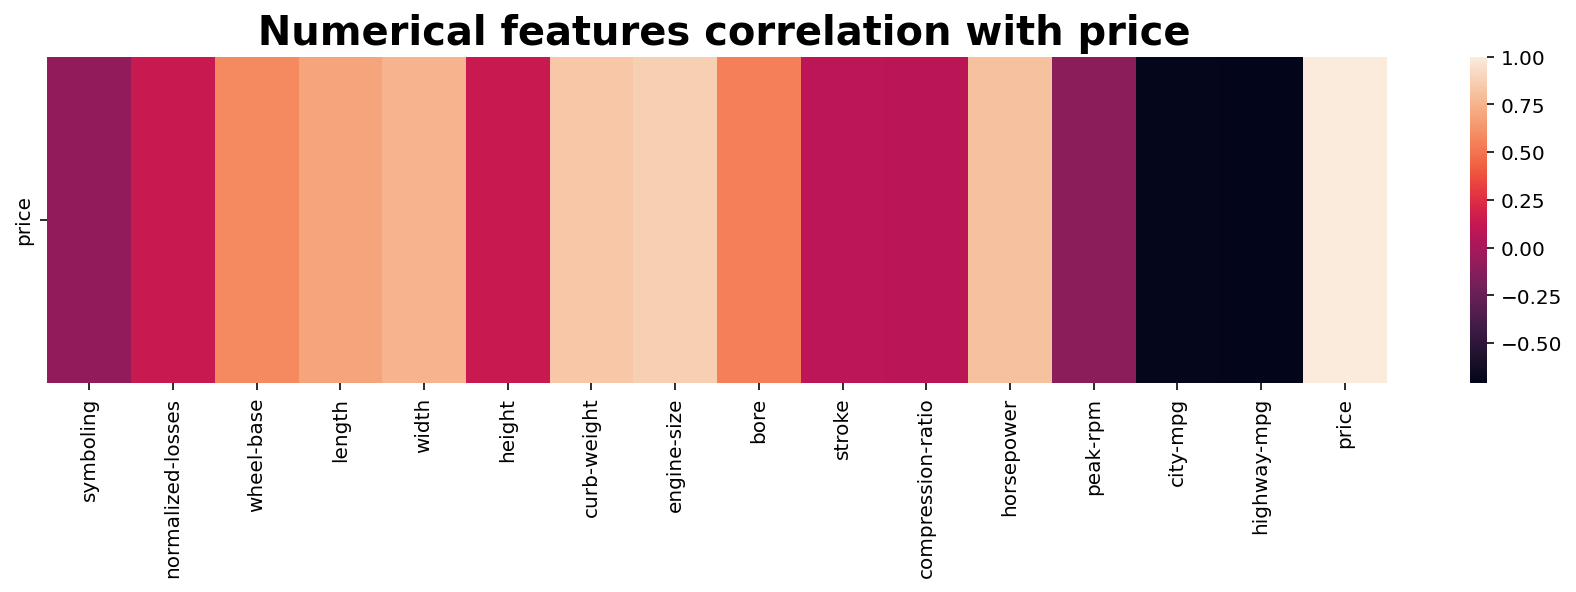

In [111]:
num = df.select_dtypes(include=np.number)
numcorr = num.corr()
f,ax = plt.subplots(figsize=(15,3))
sns.heatmap(numcorr.sort_values(by=['price'], ascending=False).head(1))
plt.title(" Numerical features correlation with price", weight='bold', fontsize=20)
plt.show()

Отсортируем по убыванию значения корреляций.

In [112]:
Num = numcorr['price'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,price
price,1.000000
engine-size,0.872152
curb-weight,0.834059
horsepower,0.811081
width,0.751628
length,0.691207
wheel-base,0.583842
bore,0.542560
normalized-losses,0.135869
height,0.133639


Что видим? Размер двигателя, снаряженная масса, лошадиные силы имеют самые высокие значения корреляции с ценой.

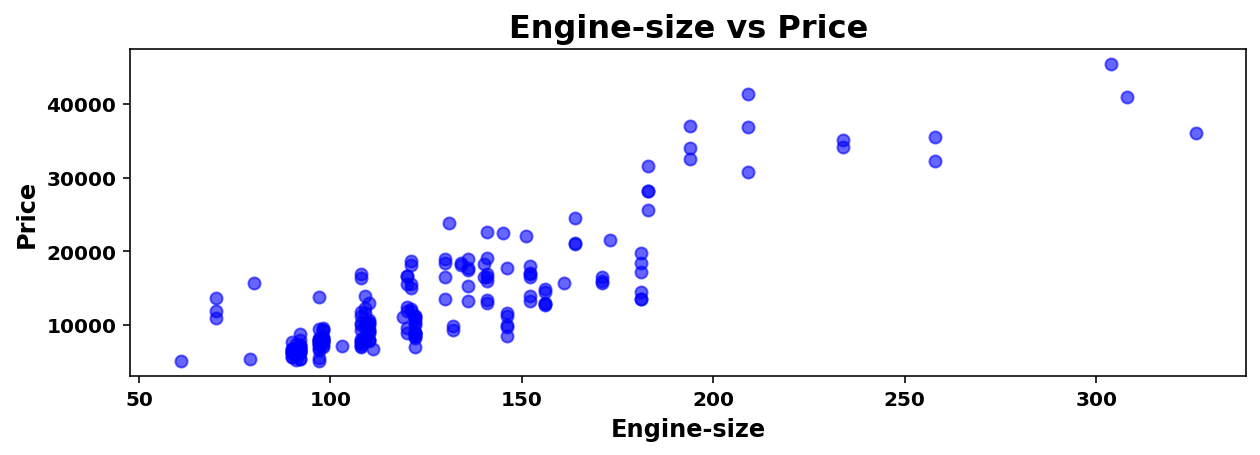

In [113]:
plt.figure(figsize=(10,3))
plt.scatter(x=df['engine-size'], y=df['price'], color='blue', alpha=0.6)
plt.title('Engine-size vs Price', weight='bold', fontsize=16)
plt.xlabel('Engine-size', weight='bold', fontsize=12)
plt.ylabel('Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

Посмотрим на распределение некторых 

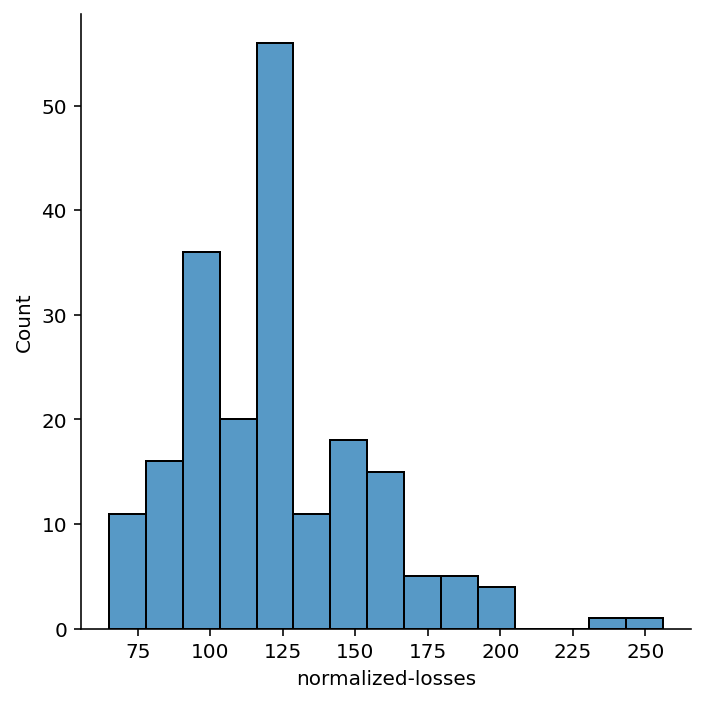

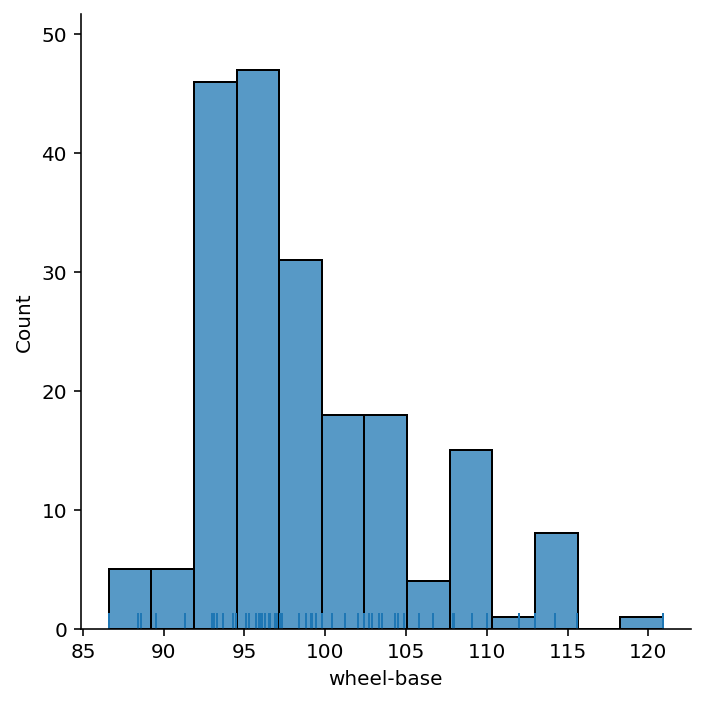

In [114]:
sns.displot(df['normalized-losses'])
plt.show()

sns.displot(df['wheel-base'], rug=True)
plt.show()

Построим парное распределение некоторых признаков.

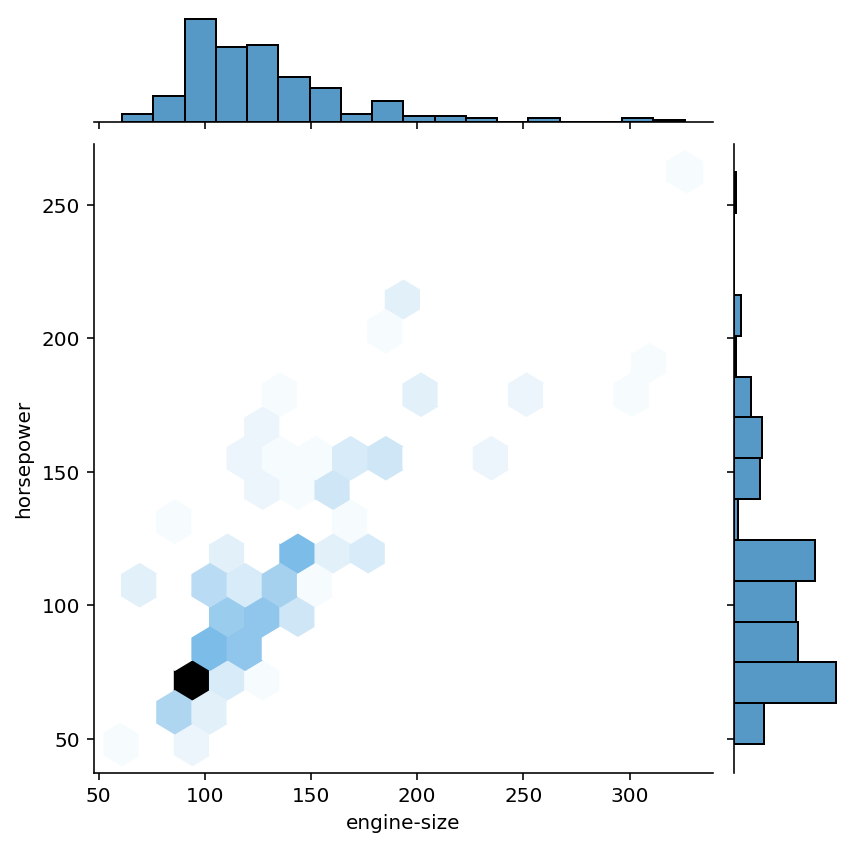

In [115]:
sns.jointplot(data = df, x=df['engine-size'], y=df['horsepower'], kind="hex")
plt.show()

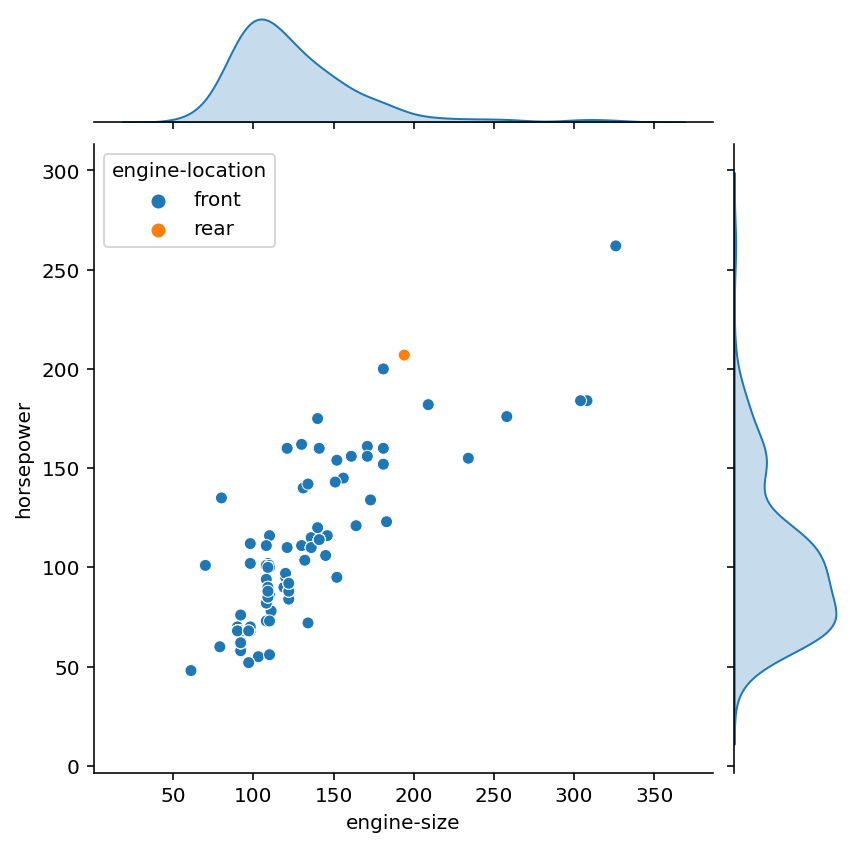

In [116]:
sns.jointplot(data = df, x=df['engine-size'], y=df['horsepower'], hue="engine-location")
plt.show()

Теперь разберемся с категориальными признаками. 

<ipython-input-117-06b10b79b742>:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)


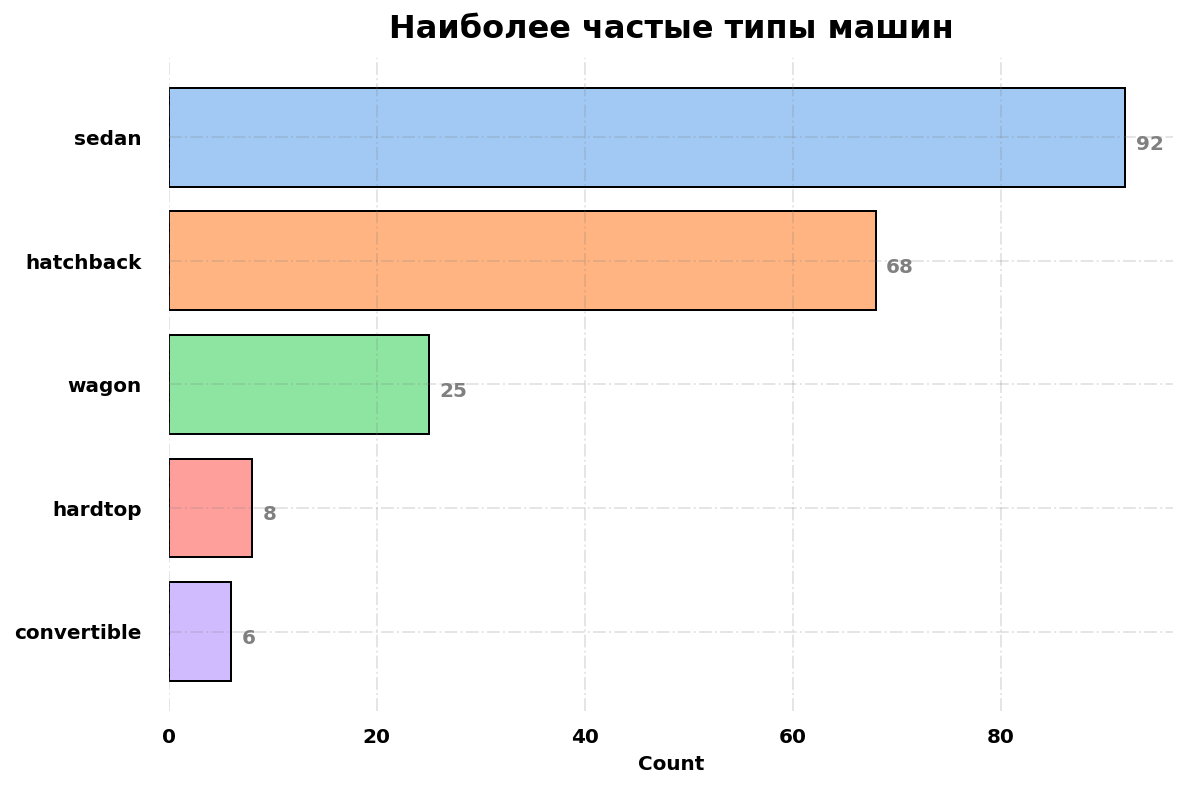

In [117]:
df.rename(columns={'body-style': 'bodystyle'}, inplace=True)

# Ставим размер 
fig, ax = plt.subplots(figsize=(9,6))

# Рисуем гистограмму
title_cnt=df.bodystyle.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

# Удаляем границы осей
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Удаляем деления x,y
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Добавляем отступы между осями и подписями
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Добавляем оси
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Отобразим по убыванию 
ax.invert_yaxis()

# Добавляем подписи
ax.set_title('Наиболее частые типы машин',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')

# Добавляем аннотацию
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Рисуем
plt.show()

<ipython-input-118-19c1d33d7865>:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)


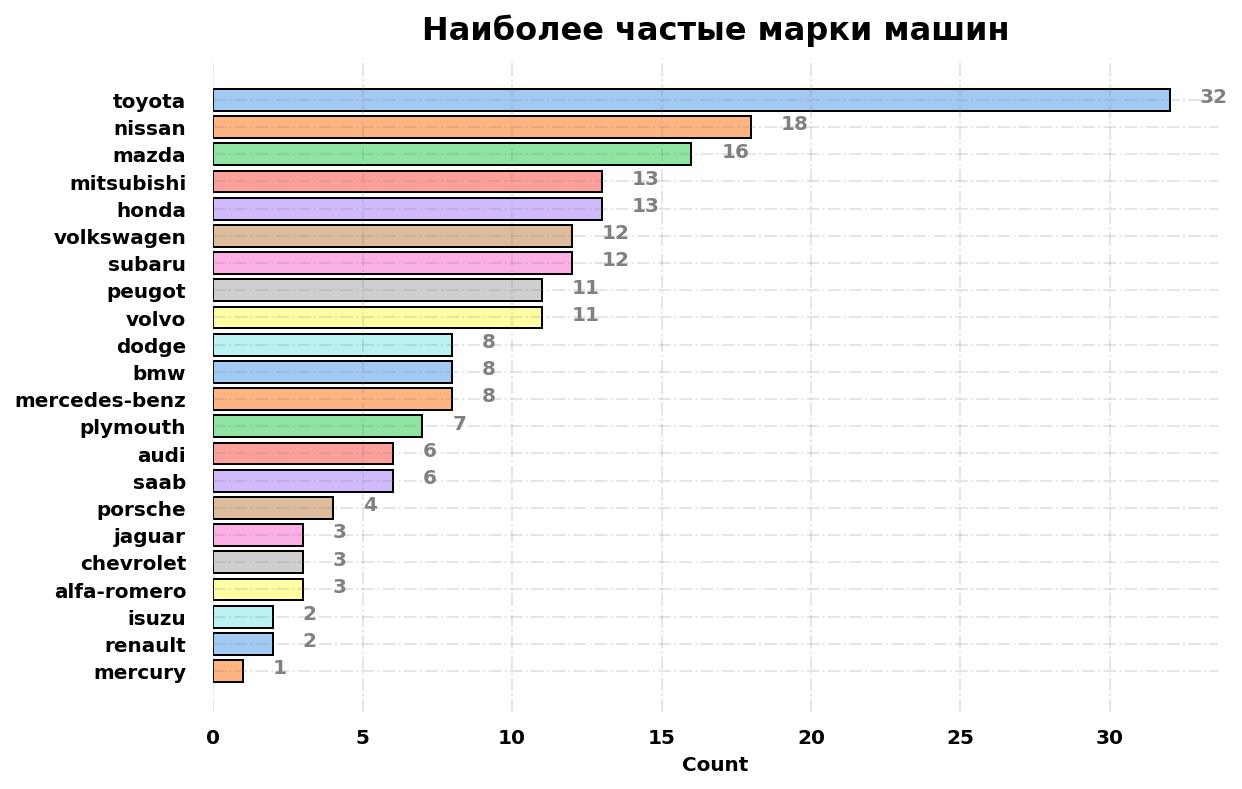

In [118]:
fig, ax = plt.subplots(figsize=(9,6))

title_cnt=df.make.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)
 
ax.invert_yaxis()

ax.set_title('Наиболее частые марки машин',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()

Построим теперь boxplot-ы для численных признаков.

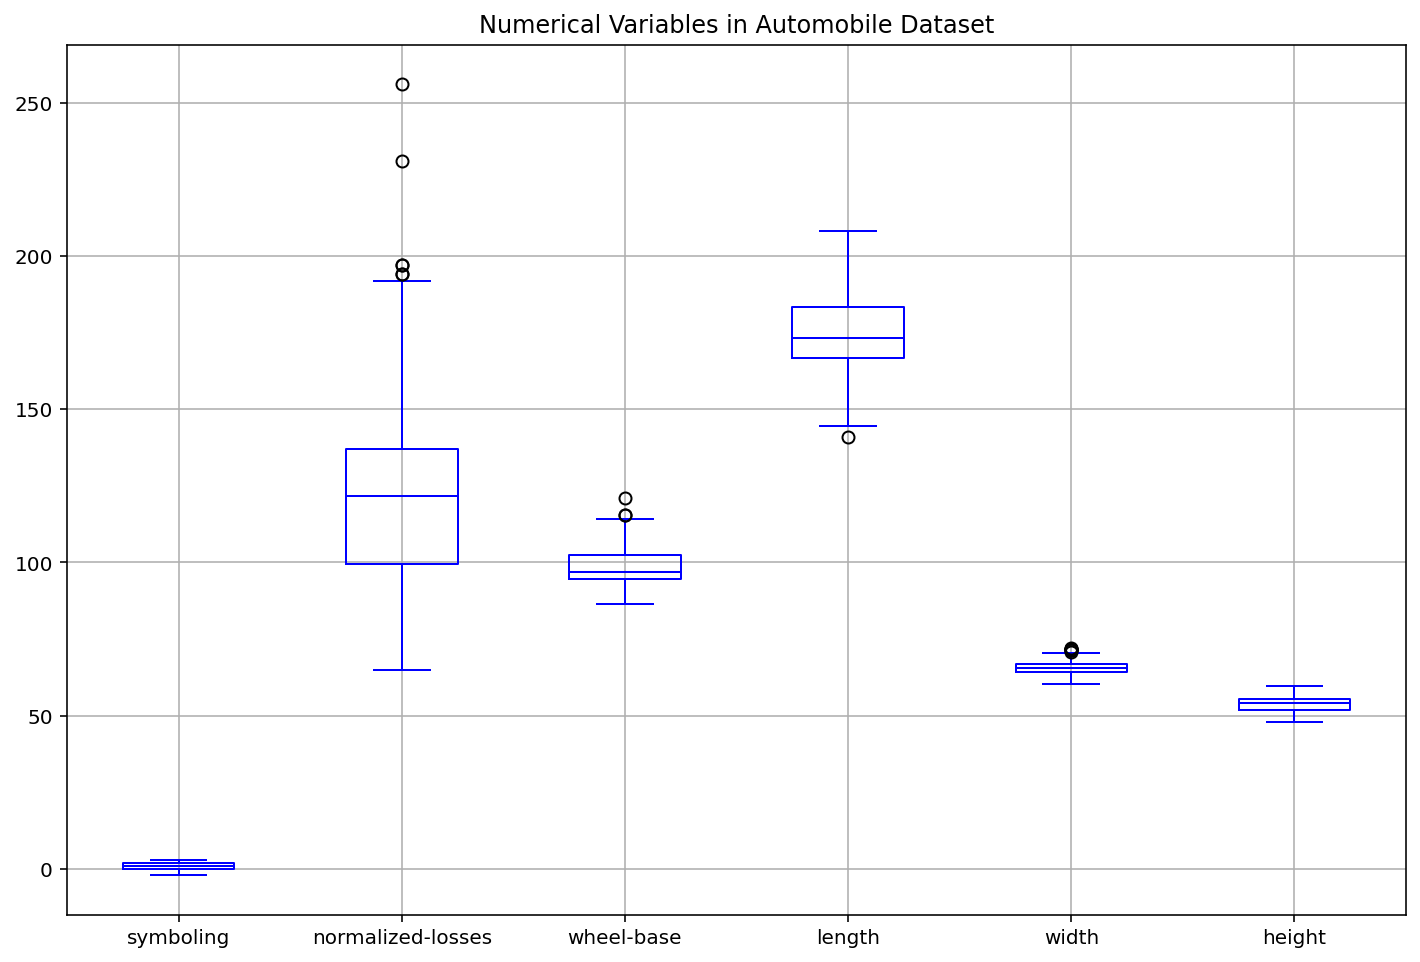

In [119]:
numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height'] 
plt.figure(figsize=(12,8))
plt.title("Numerical Variables in Automobile Dataset")
df[numeric_cols].boxplot(color='blue')
plt.show()

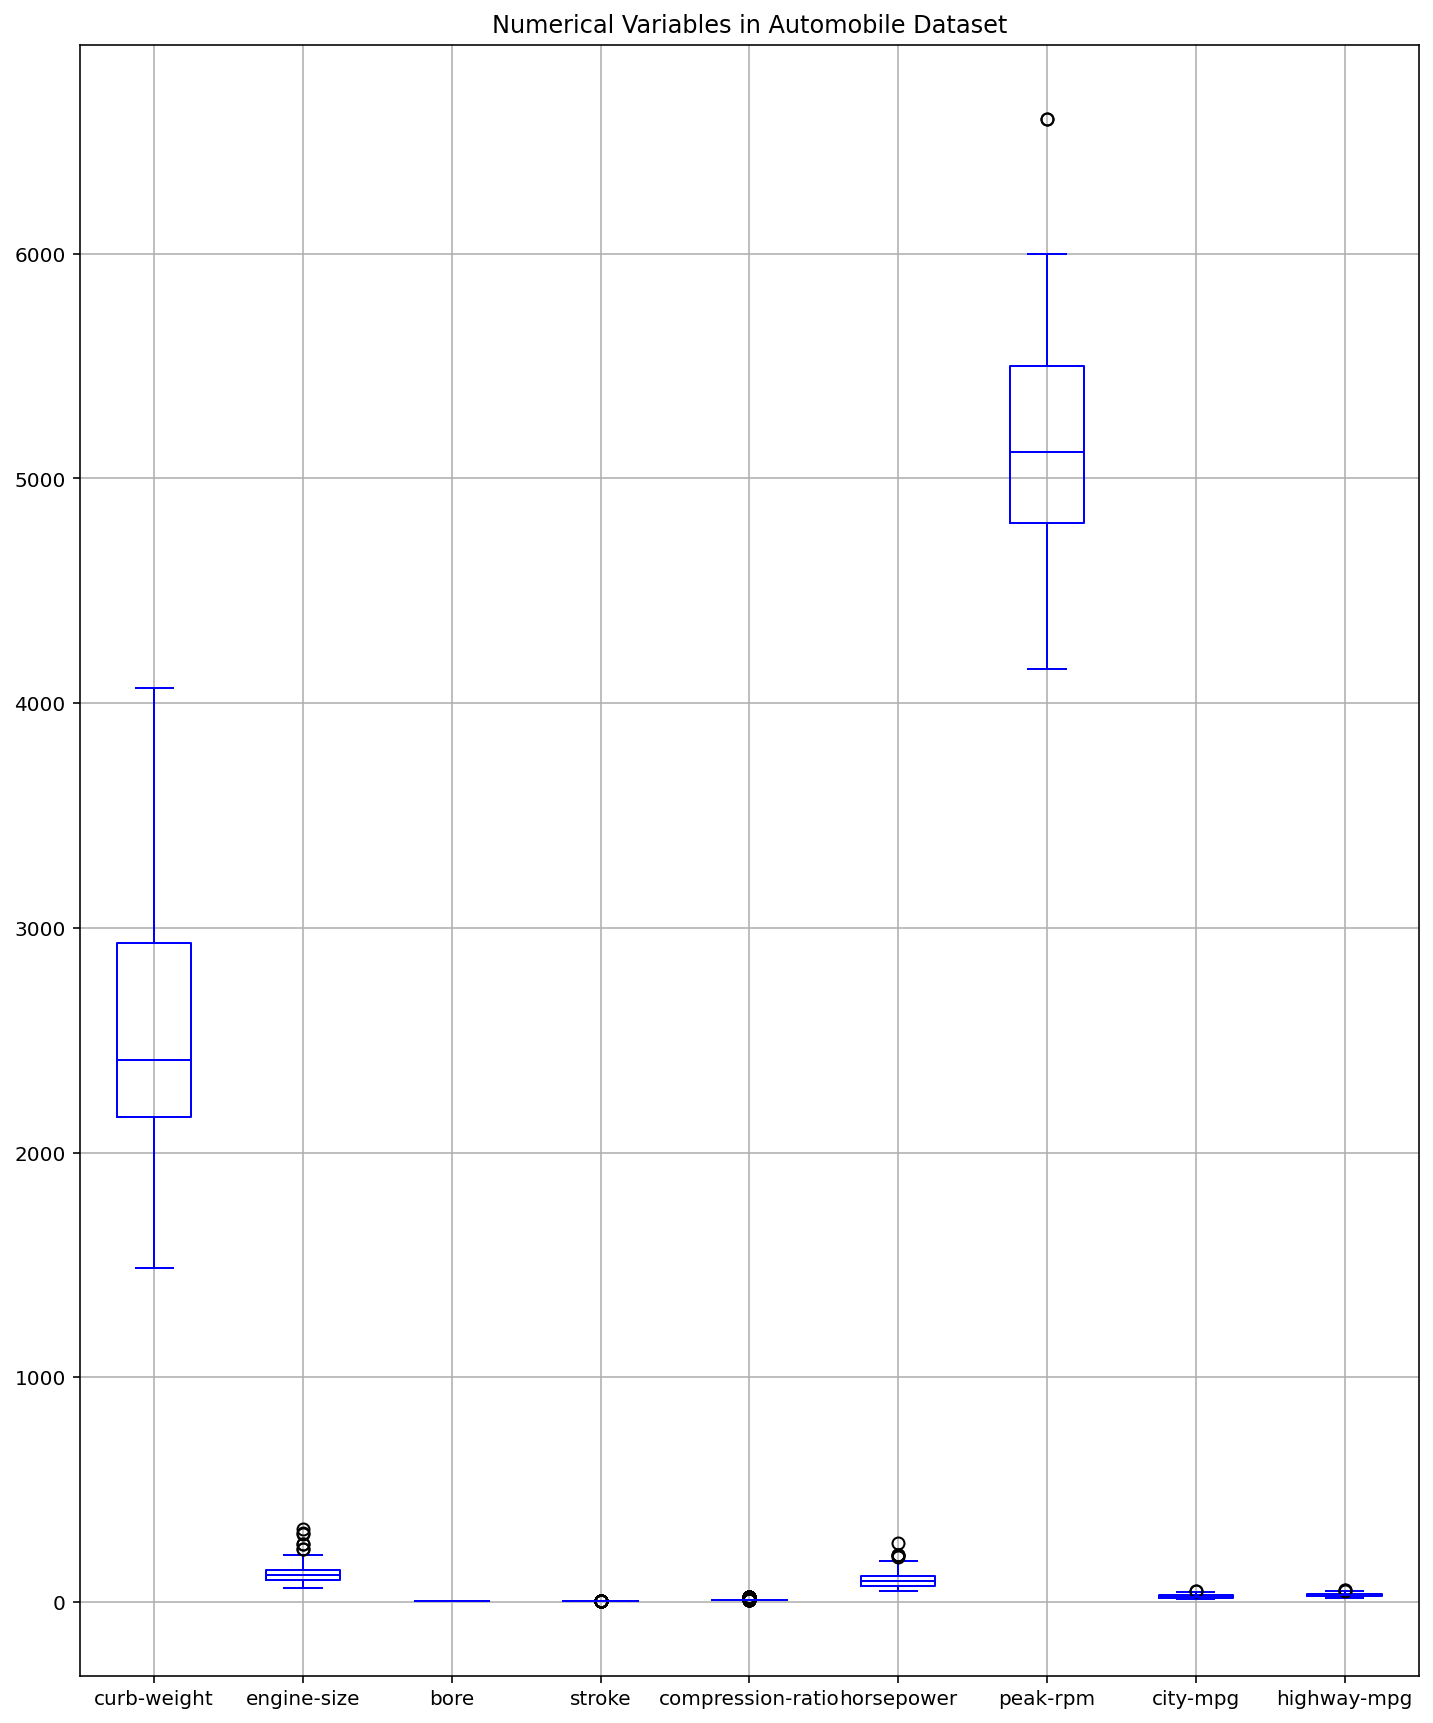

In [120]:
numeric_cols = ['curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
plt.figure(figsize=(12,15))
plt.title("Numerical Variables in Automobile Dataset")
df[numeric_cols].boxplot(color='blue')
plt.show()

Устраним выбросы.

In [121]:
df.rename(columns={'normalized-losses': 'normalizedlosses', 'peak-rpm': 'peakrpm'}, inplace=True)
df.columns

Index(['symboling', 'normalizedlosses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'bodystyle', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [122]:
df['normalizedlosses'].unique()

array([121.8404908, 164.       , 158.       , 192.       , 188.       ,
       121.       ,  98.       ,  81.       , 118.       , 148.       ,
       110.       , 145.       , 137.       , 101.       ,  78.       ,
       106.       ,  85.       , 107.       , 104.       , 113.       ,
       150.       , 129.       , 115.       ,  93.       , 142.       ,
       161.       , 153.       , 125.       , 128.       , 122.       ,
       103.       , 168.       , 108.       , 194.       , 231.       ,
       119.       , 154.       ,  74.       , 186.       ,  83.       ,
       102.       ,  89.       ,  87.       ,  77.       ,  91.       ,
       134.       ,  65.       , 197.       ,  90.       ,  94.       ,
       256.       ,  95.       ])

In [123]:
df['normalizedlosses'] = df['normalizedlosses'].replace(256.0, np.nan)
df['normalizedlosses'].fillna(df['normalizedlosses'].mean(), inplace=True)
df['normalizedlosses'] = df['normalizedlosses'].replace(231.0, np.nan)
df['normalizedlosses'].fillna(df['normalizedlosses'].mean(), inplace=True)

In [124]:
df['peakrpm'].unique()

array([5000.        , 5500.        , 5800.        , 4250.        ,
       5400.        , 5100.        , 4800.        , 6000.        ,
       4750.        , 4200.        , 4350.        , 4500.        ,
       5200.        , 4150.        , 5600.        , 5900.        ,
       5118.02030457, 5250.        , 4900.        , 4400.        ,
       6600.        , 5300.        ])

In [125]:
df[df.peakrpm == 6600.0]

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
165,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0


In [126]:
i = df[((df.peakrpm == 6600.0))].index
df = df.drop(i)

Теперь преобразуем категориальные признаки.

In [127]:
print(df["num-of-doors"].value_counts())
print(df["num-of-cylinders"].value_counts())

four    113
two      84
Name: num-of-doors, dtype: int64
four      153
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64


In [128]:
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df = df.replace(cleanup_nums)
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
0,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.840491,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [129]:
df.rename(columns={'body-style': 'bodystyle', 'drive-wheels': 'drivewheels'}, inplace=True)

In [130]:
print(df['bodystyle'].unique())
print(df['drivewheels'].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']


In [131]:
df = pd.get_dummies(df, columns=["bodystyle", "drivewheels"], prefix=["body", "drive"])
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,...,highway-mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,13495.0,1,0,0,0,0,0,0,1
1,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,16500.0,1,0,0,0,0,0,0,1
2,1,121.840491,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.000000,audi,gas,std,4,front,99.8,176.6,66.2,...,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.000000,audi,gas,std,4,front,99.4,176.6,66.4,...,22,17450.0,0,0,0,1,0,1,0,0


In [132]:
df["engine-type"].value_counts()

ohc      143
ohcf      15
ohcv      13
l         12
dohc      10
rotor      4
Name: engine-type, dtype: int64

In [137]:
df["OHC_Code"] = np.where(df["engine-type"].str.contains("ohc"), 1, 0)
df[["make", "engine-type", "OHC_Code"]].head()

,make,engine-type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


Для кодировки будем использовать специальную библиотеку category_encoders.

In [133]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
from category_encoders import CountEncoder

count_enc = CountEncoder()
df["make_code"] = count_enc.fit_transform(df[["make"]])
df[["make", "make_code"]].head(10)

,make,make_code
0,alfa-romero,3
1,alfa-romero,3
2,alfa-romero,3
3,audi,6
4,audi,6
5,audi,6
6,audi,6
7,audi,6
8,audi,6
10,bmw,8


Формируем финальную таблицу.

In [138]:
df_final = df[['symboling', 'normalizedlosses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
           'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg', 'price', 'num-of-doors', 'num-of-cylinders', 'body_convertible', 
           'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'OHC_Code', 'make_code']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   normalizedlosses   197 non-null    float64
 2   wheel-base         197 non-null    float64
 3   length             197 non-null    float64
 4   width              197 non-null    float64
 5   height             197 non-null    float64
 6   curb-weight        197 non-null    int64  
 7   engine-size        197 non-null    int64  
 8   bore               197 non-null    float64
 9   stroke             197 non-null    float64
 10  compression-ratio  197 non-null    float64
 11  horsepower         197 non-null    float64
 12  peakrpm            197 non-null    float64
 13  city-mpg           197 non-null    int64  
 14  highway-mpg        197 non-null    int64  
 15  price              197 non-null    float64
 16  num-of-doors       197 non

Пора строить модель!

In [150]:
X = df_final.drop('price',axis = 1)
y = df_final['price']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Не забудем стандартизировать признаки.

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [180]:
reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)

In [181]:
print("MSE (KNN | LR): ", mean_squared_error(y_test, predictions))
print("MAE (KNN | LR): ", mean_absolute_error(y_test, predictions))
print("MAX_ERROR (KNN | LR): ", max_error(y_test, predictions))

print("R2 (KNN | LR): ", r2_score(y_test, predictions))
print("MAPE (KNN | LR): ", mean_absolute_percentage_error(y_test, predictions))

MSE (KNN | LR):  17338127.748351377
MAE (KNN | LR):  2856.4622373441493
MAX_ERROR (KNN | LR):  14799.108824129726
R2 (KNN | LR):  0.8875048446707078
MAPE (KNN | LR):  0.1843414970690488


<AxesSubplot:xlabel='price'>

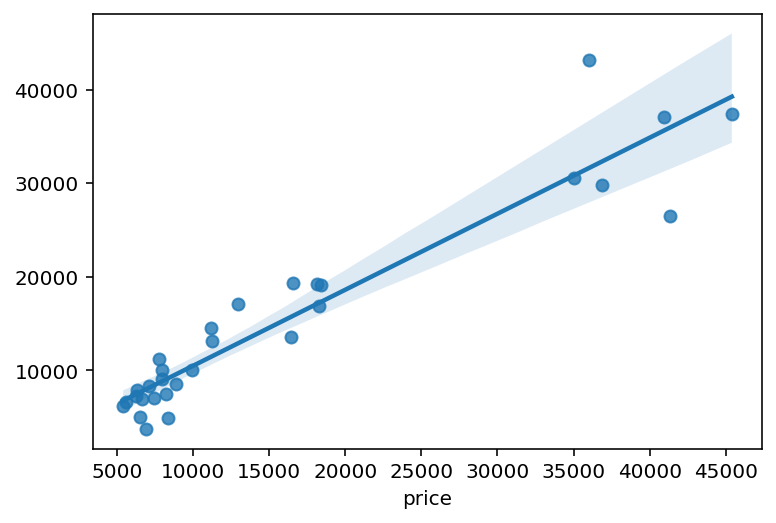

In [182]:
sns.regplot(x = y_test, y = predictions)

Выводим коэффициенты регрессии.

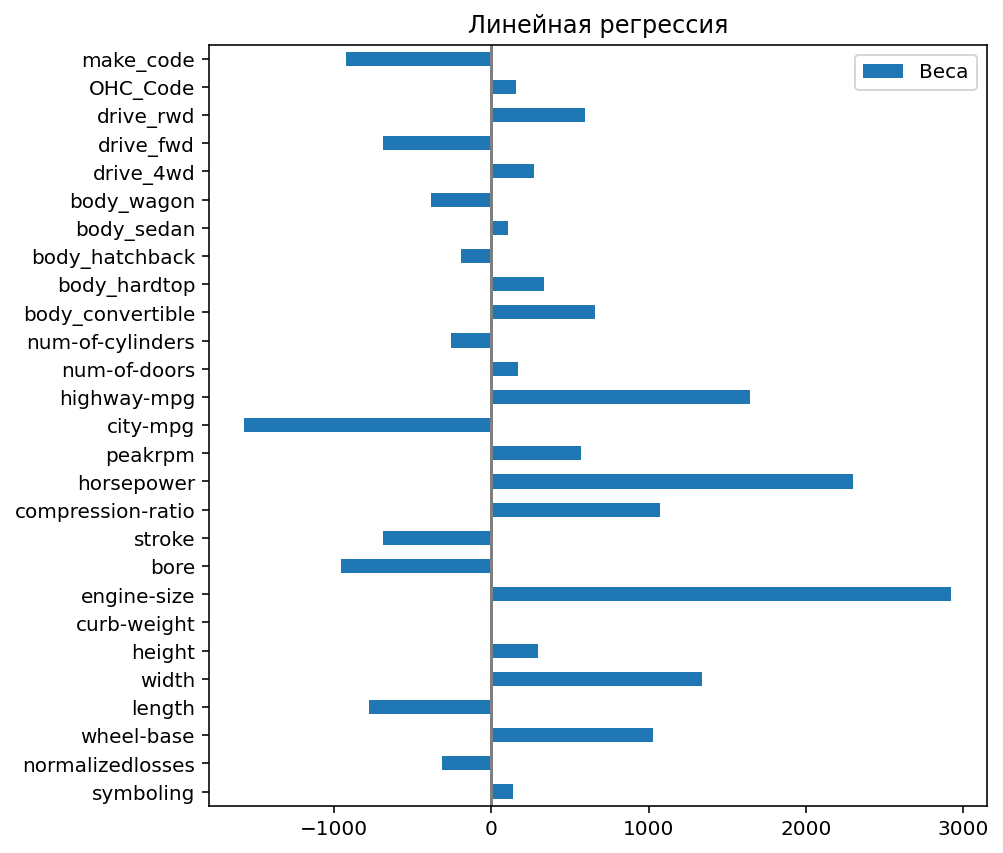

In [175]:
coefs = pd.DataFrame(
   reg.coef_,
   columns=['Веса'], index=df_final.drop('price',axis = 1).columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Линейная регрессия')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Выводы

Сегодня мы познакомились с постановкой задачи регрессии, разобрались какие данные являются размеченными и какие метки говорят о том, что это задача регрессии. 
Мы узнали о двух моделях машинного обучения, которые решают задачи регрессии, а также поговорили о метриках качества, которые используются для проверки полученного решения в задачах такого типа.